In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Project by Suyash Khare and Apoorv Jain and re-run by Tan Huynh for the personal project

This RAVDESS dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

# Loading Libraries

In [ ]:
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

# Upload the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ravdess-emotional-speech-audio


# Loading a audio

In [ ]:
x, sr = librosa.load('/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')
# Purpose: Loads an audio file using librosa.
# x: A NumPy array containing the audio time series (i.e., waveform values).
# sr: The sampling rate (number of samples per second). Default in librosa.load() is 22050 Hz unless specified.
# File path: It points to a specific .wav file from the RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) dataset.

sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
# Purpose: Saves a new audio file using the soundfile (aliased as sf) library.
# np.random.randn(10, 2): Generates a dummy stereo signal (10 samples × 2 channels) with random values from a normal distribution.
# 44100: Sampling rate (standard CD quality).
# 'PCM_24': The format for encoding—24-bit PCM (Pulse Code Modulation).

Audio(data=x, rate=sr)
# Purpose: Plays the audio in a Jupyter notebook using IPython.display.Audio.
# data=x: Uses the loaded RAVDESS audio.
# rate=sr: Uses the same sampling rate as loaded.
# 🎧 This is what makes the audio playable inline in the notebook.

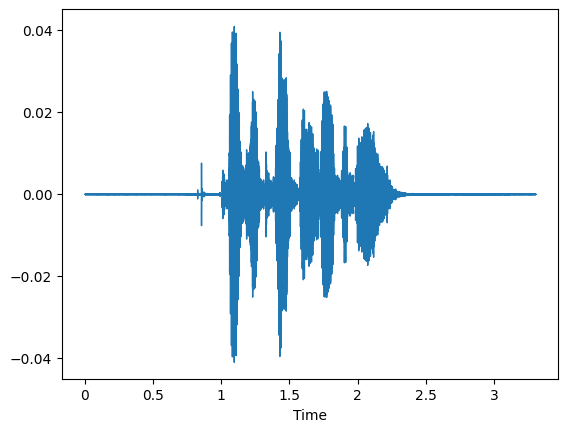

In [ ]:
librosa.display.waveshow(x,sr=sr)

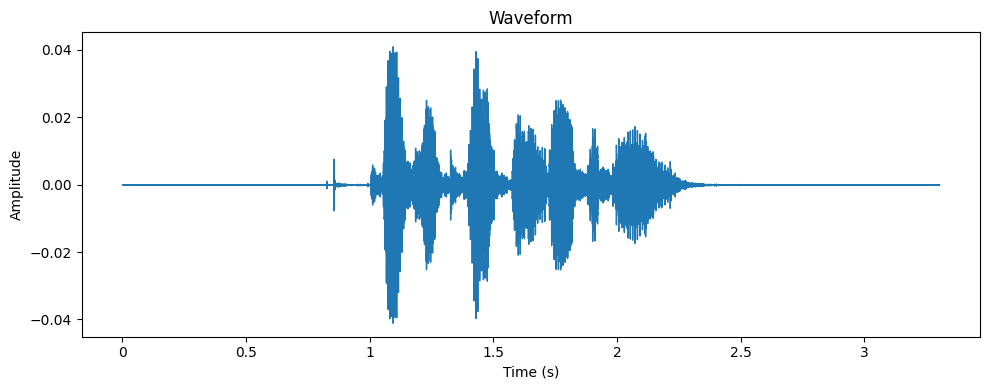

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

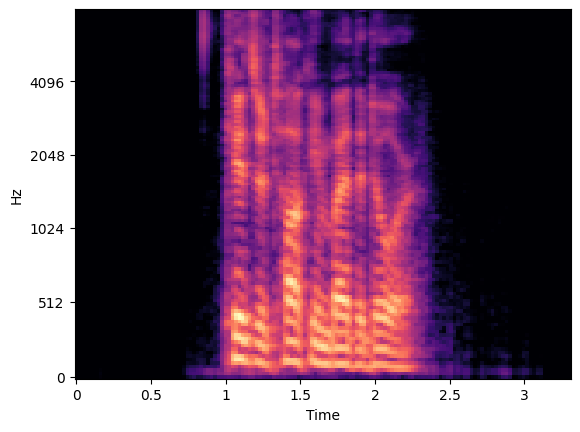

In [ ]:
spectrogram=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

# Feature Preprocessing

The speech signal usually
include many parts of silence. The silence
signal is not important because it does not contain useful
information.

**Zero crossing rate** is a measure of number of times
in a given time interval such that the amplitude
of the speech signals passes through a value of
zero.

In [ ]:
# Data Preprocessing
# Silence Removal
# Taking window of 4 and if number of zero croasigs are greater than 2,we dont include amplitudes in this wondow
def zero_crossing(x):
    zero_crossings=[]
    silence_removed=[]
    silence_removed=np.array(silence_removed)
    for i  in range(1,len(x)):
        # detecting zero crossing
        if(x[i-1]<=0 and x[i]>0):
            zero_crossings.append(1)
        else:
            zero_crossings.append(0)
    for i in range(len(zero_crossings)-3):
        zeros=np.sum(zero_crossings[4*i:4*(i+1)])
        #print(zeros)
        zeros=4-zeros
        if(zeros>2):
            silence_removed=np.concatenate((silence_removed,np.array(x[4*i:4*(i+1)])))
    print("Before Silence Removal : ",len(x),"\nAfter Silence Removal : ",len(silence_removed))
    return silence_removed

In [ ]:
silence_removed=zero_crossing(x)

Before Silence Removal :  72838 
After Silence Removal :  49490


In [ ]:
Audio(data=x, rate=sr)

In [ ]:
Audio(data=silence_removed, rate=sr)

Both silence removed and normal audio wave sounds similar.

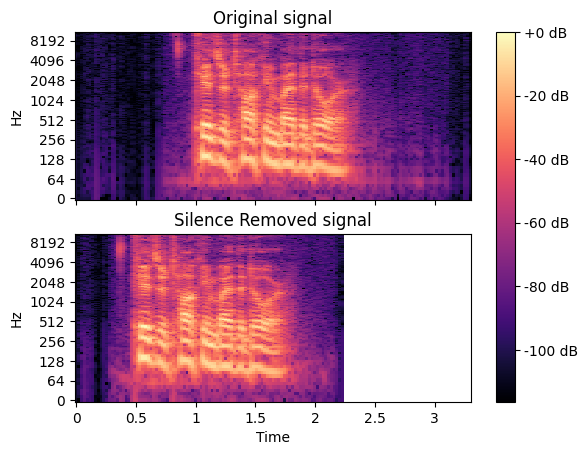

In [ ]:
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(silence_removed)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Silence Removed signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

The **pre-emphasis** of the speech
signal is the most important steps of
preprocessing at high frequency. It finds
comparable amplitude by passing the speech signal through a high-pass filter (FIR).

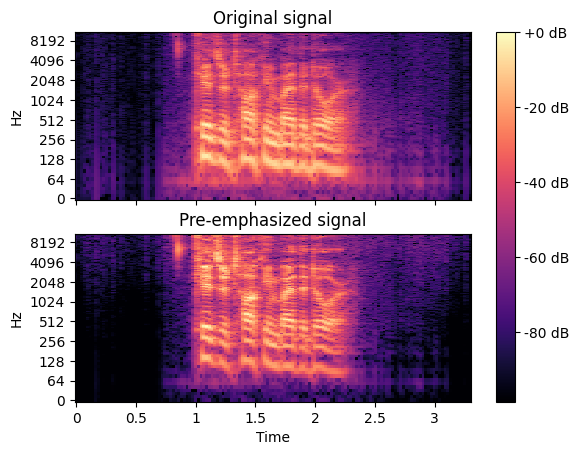

In [ ]:
#Pre-emphasis
y_filt = librosa.effects.preemphasis(x)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

**Normalization** is a strategy for modifying
the volume of sound to a standard level.

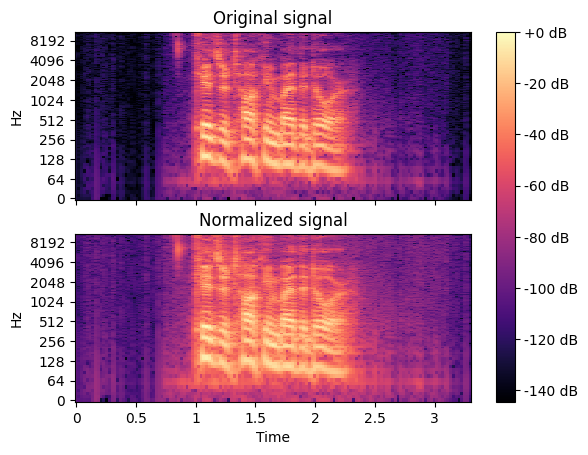

In [ ]:
#Normalization
x_norm=x/max(x)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    # zero crossing
    #silence_removed=zero_crossing(X)
    # Pre emphasis
    y_filt = librosa.effects.preemphasis(X)
    # normalization
    #x_norm=y_filt/max(y_filt)
    return y_filt,sample_rate

# Feature Extraction

In [ ]:
# All the types of emotions that are present
emotions_all={
    '01' : 'neutral',
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry',
    '06' : 'fearful' ,
    '07' : 'disgust',
    '08' : 'surprised'
}

In [ ]:
# Feature extraction using librosa a python package for audio analysis
# Chroma features

def feature_extraction(X,sample_rate):
    result = np.array([])

    # chroma stft: Compute a chromagram from a waveform or power spectrum
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # mfcc: Mel-frequency cepstral coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # melspectogram: Compute a mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result=np.hstack((result, mel))

    return result

In [ ]:
from glob import glob
files_audio = glob('/kaggle/input/ravdess-emotional-speech-audio'+'/*/*.wav')

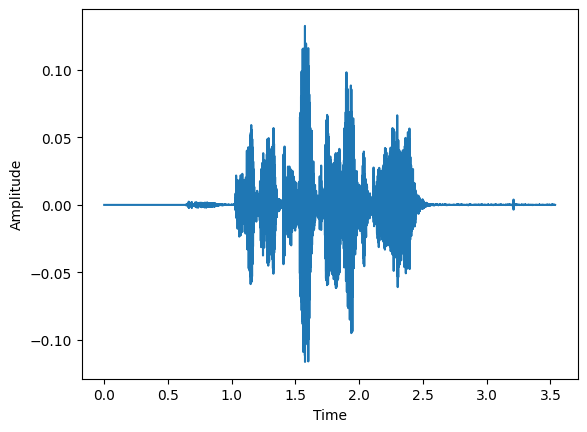

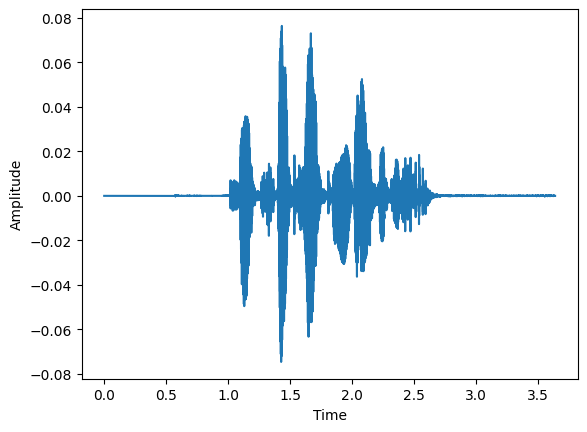

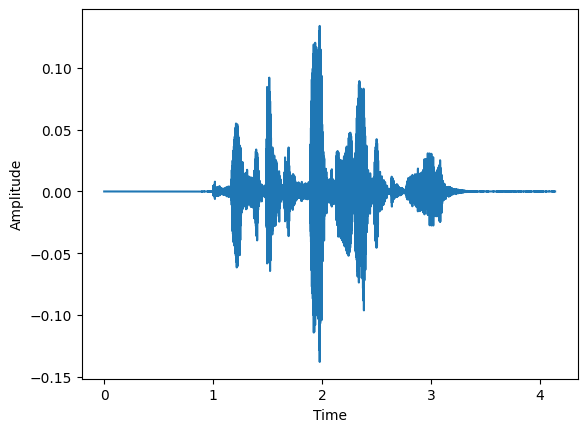

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    audio,sfreq = librosa.load(files_audio[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [ ]:
# Read File name identifiers and load data values

x,y=[],[]
# Considered the following emotions
emotions=['happy','sad','angry','fearful','disgust']

from IPython.display import clear_output
e = set()

for file in files_audio:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotions_all[file_name.split("-")[2]]
        if emotion not in emotions:
            continue
        e.add(file.split('/')[-2])
        # preprocessing audio data
        pre_speech=preprocessing(file)
        # feature extraction from audio
        feature=feature_extraction(pre_speech[0],pre_speech[1])
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_19', 'Actor_05', 'Actor_09', 'Actor_16', 'Actor_01', 'Actor_08', 'Actor_03', 'Actor_21', 'Actor_15', 'Actor_18', 'Actor_12', 'Actor_06', 'Actor_22', 'Actor_04', 'Actor_13', 'Actor_14', 'Actor_17', 'Actor_11', 'Actor_07', 'Actor_20', 'Actor_23', 'Actor_02', 'Actor_10', 'Actor_24'}


In [ ]:
# features of audio
x = np.array(x)

<BarContainer object of 5 artists>

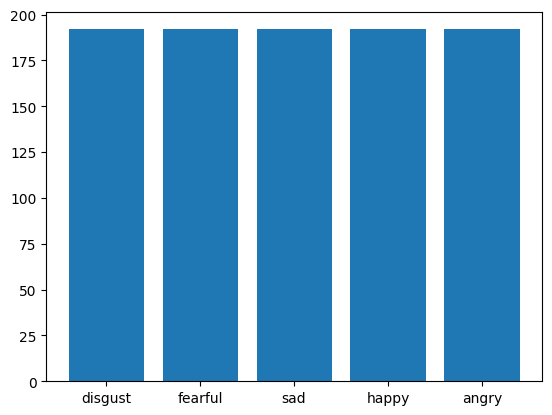

In [ ]:
from collections import Counter
target_count=pd.Series(Counter(y))
plt.bar(target_count.index,target_count)

In [ ]:
x.shape

(960, 160)

In [ ]:
len(y)

960

In [ ]:
# Encoding technique to handle categorical variables (Emotions)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Transform features by scaling each feature to given range
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4,shuffle=True,stratify=y)

Decision Tree Classifier Models

In [ ]:
# XGBClassifier: Boosting algorithm based on gradient boosted decision trees algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=XGBClassifier()
#Training
model.fit(x_train,y_train)
#Prediction
y_pred1=model.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.6666666666666666


In [ ]:
# LGBMClassifier: Light gradient boosting
import lightgbm as lgb
#from lightgbm import LightGBMClassifier
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train, y_train,
          eval_set=[(x_test, y_test), (x_train, y_train)],
          eval_metric='logloss',
          callbacks=[lgb.early_stopping(stopping_rounds=10),  # Optional: add early stopping
                     lgb.log_evaluation(period=20)])         # Control verbosity

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40800
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 160
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[Ligh

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
y_pred2=model.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.6770833333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# RandomForestClassifier: Ensemble learning method for classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(x_train,y_train)
y_pred3=clf.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.4322916666666667


In [ ]:
# MLPClassifier: Multi layer perceptron classifier
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,100), learning_rate='adaptive', max_iter=1000)
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print(accuracy_score(y_test,y_pred4))

0.6354166666666666


# Evaluation

Confusion Matrix

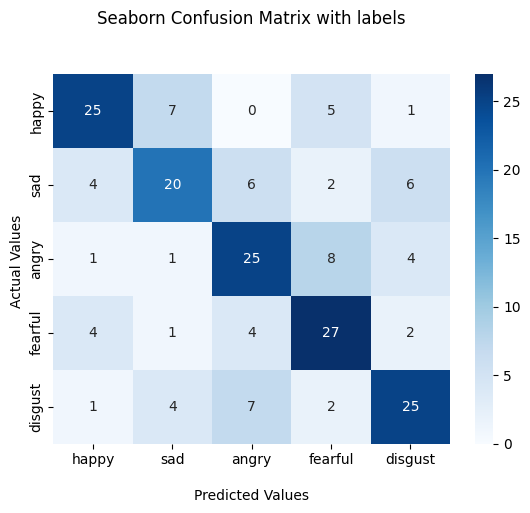

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred4, labels=[0,1,2,3,4])
import seaborn as sns

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])
ax.yaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])

## Display the visualization of the Confusion Matrix.
plt.show()

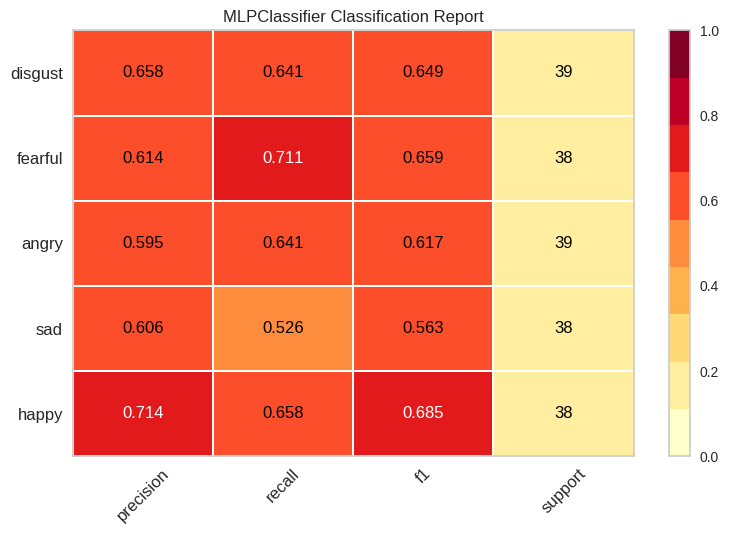

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, classes=['happy','sad','angry','fearful','disgust'], support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# Testing

In [ ]:
emotions_all={
    '01' : 'neutral',
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry',
    '06' : 'fearful' ,
    '07' : 'disgust',
    '08' : 'surprised'
}

Loading a audio for testing

In [ ]:
import os

# Path to your dataset
dataset_path = '/kaggle/input/ravdess-emotional-speech-audio'

# List all files (recursively)
all_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        all_files.append(os.path.join(root, file))

# Print all file paths
for file_path in all_files:
    print(file_path)

# Optional: Print total number of files
print(f"\nTotal number of files: {len(all_files)}")


/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [ ]:
test_audio, sr = librosa.load('/kaggle/input/ravdess-emotional-speech-audio/Actor_04/03-01-04-01-02-02-04.wav')
Audio(data=test_audio, rate=sr)

In [ ]:
emotion=emotions_all['03-01-04-01-02-02-04'.split("-")[2]]

In [ ]:
# Actual Emotion
emotion

'sad'

In [ ]:
x=[]
y=[]
pre_speech=preprocessing('/kaggle/input/ravdess-emotional-speech-audio/Actor_04/03-01-04-01-02-02-04.wav')
feature=feature_extraction(pre_speech[0],pre_speech[1])
x.append(feature)
y.append(emotion)

In [ ]:
pred=model.predict(x)

In [ ]:
# Predicted Emotion
label_encoder.inverse_transform(pred)

array(['fearful'], dtype='<U7')

Correct label

# Deep Learning model LSTM

In [1]:
import pandas as pd
import numpy as np

import os
import sys
import random

# librosa is a Python library for analyzing audio and music.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow.keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

from keras.models import Sequential, Model
from keras.layers import Dense, GRU, LSTM, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
#from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dropout

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
import kagglehub

# "{ latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ravdess-emotional-speech-audio


In [9]:
# Paths for data.
Ravdess = f"{path}/audio_speech_actors_01-24/"


In [10]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_statement = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that auido.
        file_emotion.append(int(part[2]))
        file_statement.append(int(part[4]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
#emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
#path_df = pd.DataFrame(file_path, columns=['Path'])
#Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df = pd.DataFrame({"Emotions":file_emotion, "Statement":file_statement, "Path":file_path})

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-10-6138645a54fc>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions  Statement                                               Path
0  surprise          1  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral          1  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust          1  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust          1  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral          2  /kaggle/input/ravdess-emotional-speech-audio/a...

In [11]:
Ravdess_df.shape

(1440, 3)

In [12]:
Ravdess_df.groupby(['Emotions','Statement']).size().unstack()

Statement   1   2
Emotions         
angry      96  96
calm       96  96
disgust    96  96
fear       96  96
happy      96  96
neutral    48  48
sad        96  96
surprise   96  96

In [13]:
# creating a copy
data_path = Ravdess_df[['Emotions','Path']].copy()
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

## Data Visualisation and Exploration

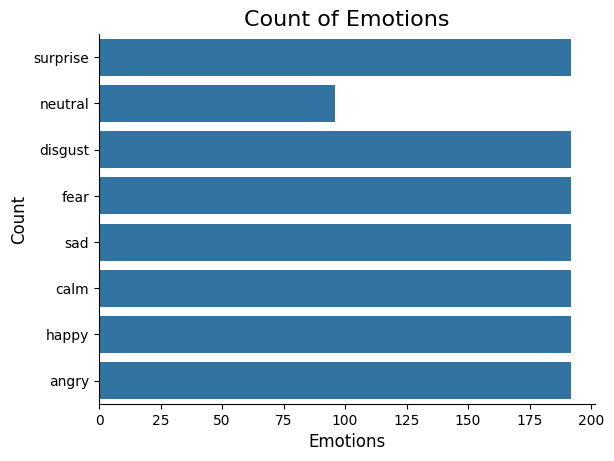

In [14]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Plotting waveplots and spectograms for audio signals.

In [15]:
def create_waveplot(data, sr):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

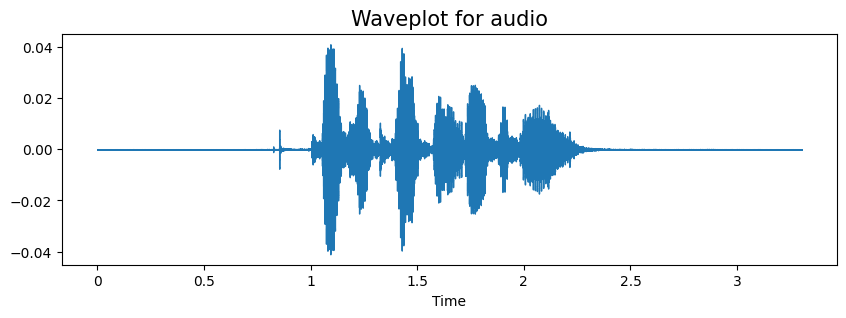

In [16]:
path = "/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
Audio(path)

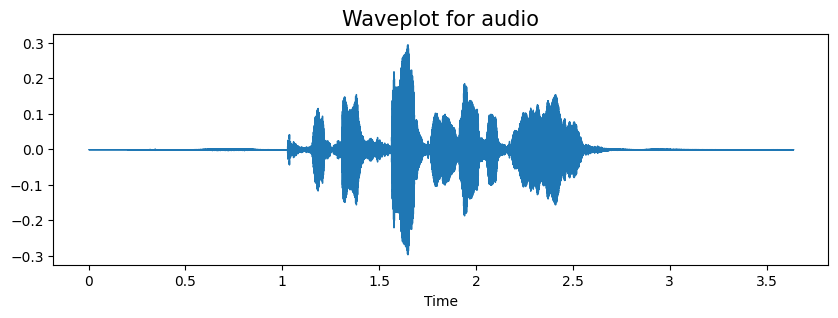

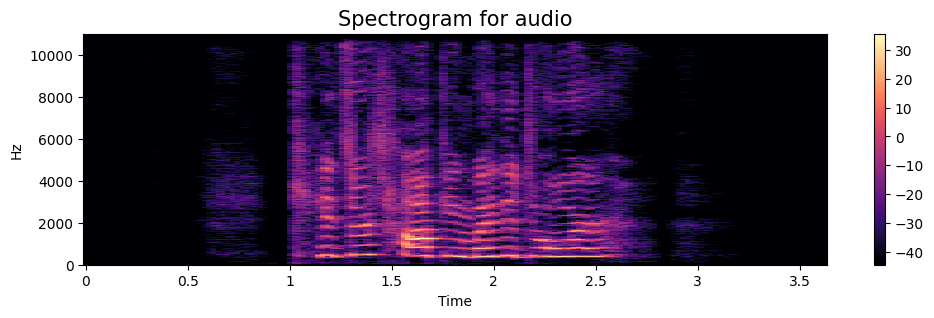

In [17]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
create_spectrogram(data, sampling_rate)
Audio(path)

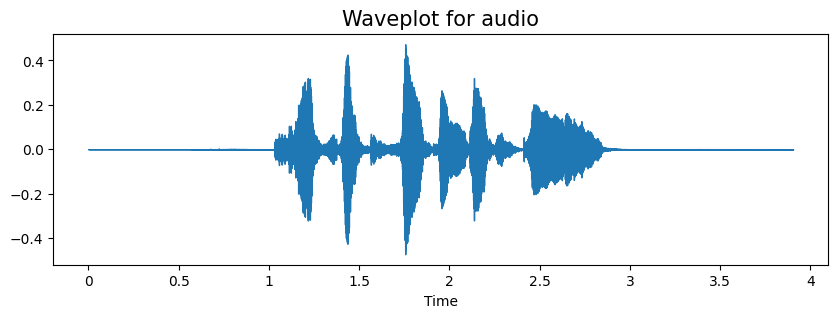

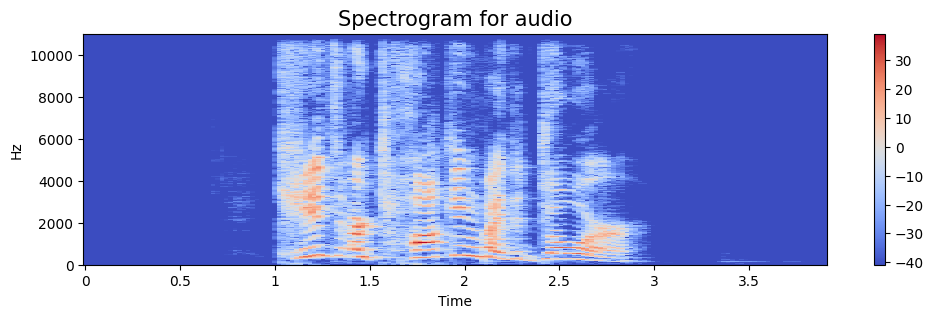

In [18]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
create_spectrogram(data, sampling_rate)
Audio(path)

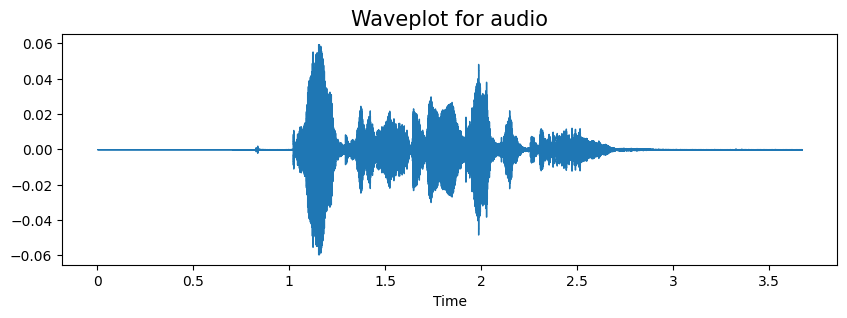

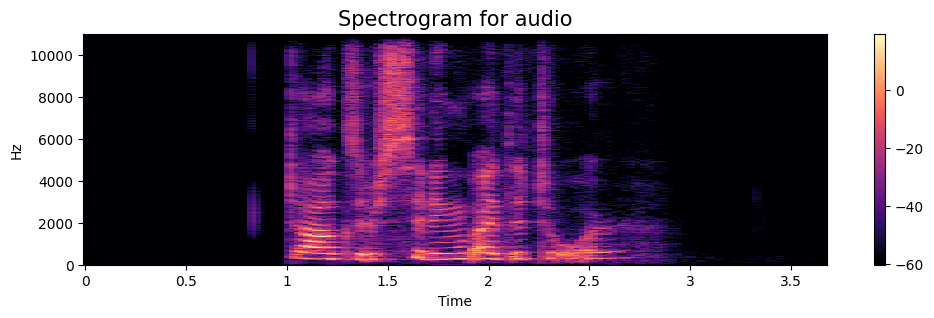

In [19]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
create_spectrogram(data, sampling_rate)
Audio(path)


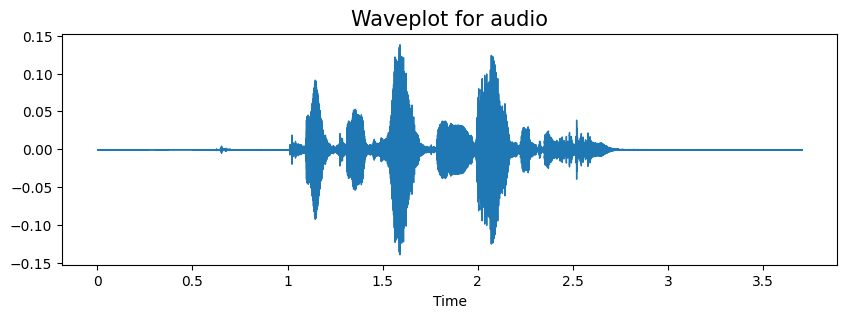

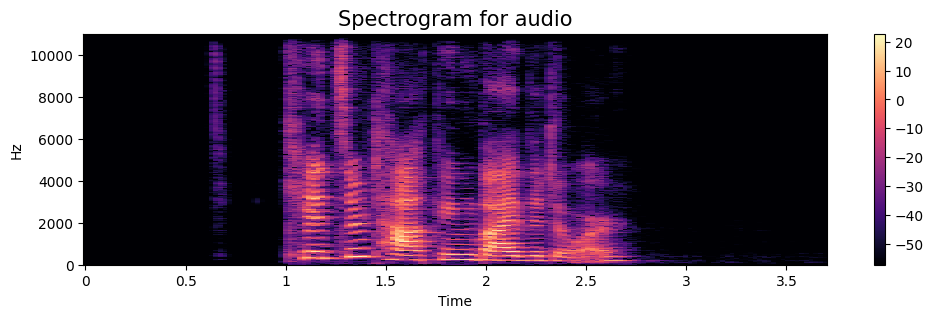

In [20]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate)
create_spectrogram(data, sampling_rate)
Audio(path)

## Data Augmentation

- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- Using Random transformations and augmenting data before training.

In [21]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.85):
    return librosa.effects.time_stretch(data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

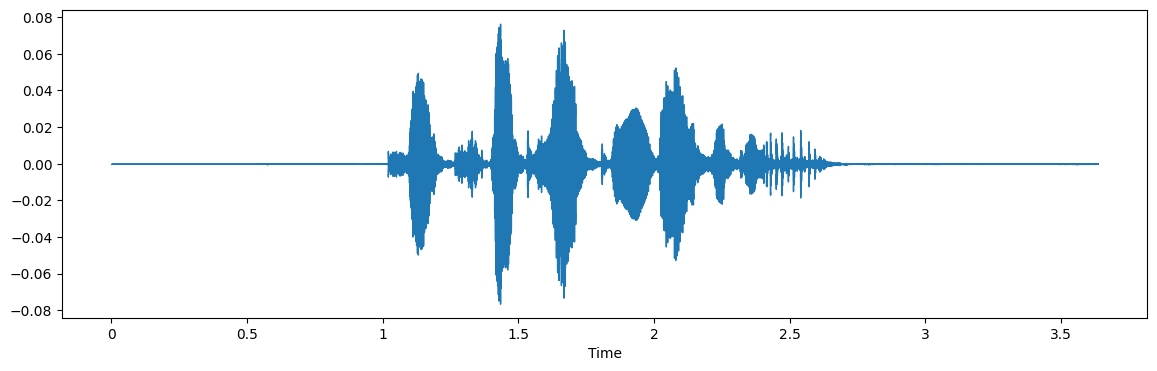

In [22]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

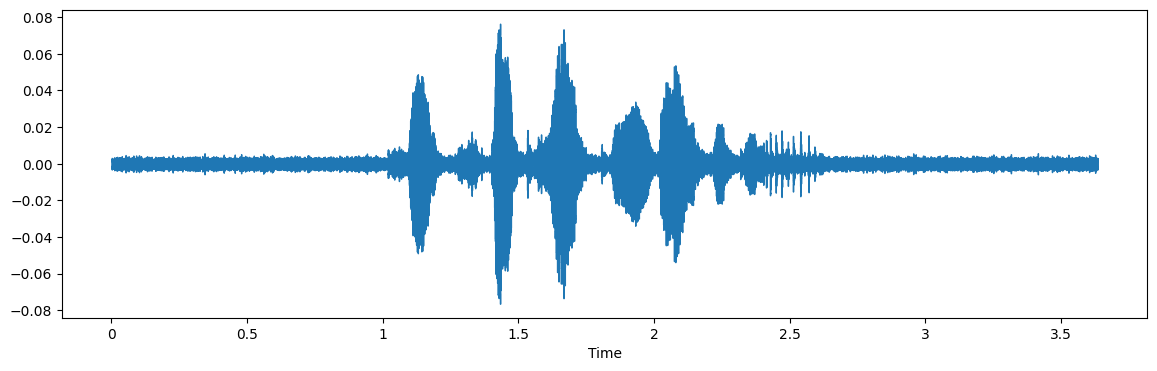

In [23]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3. Stretching

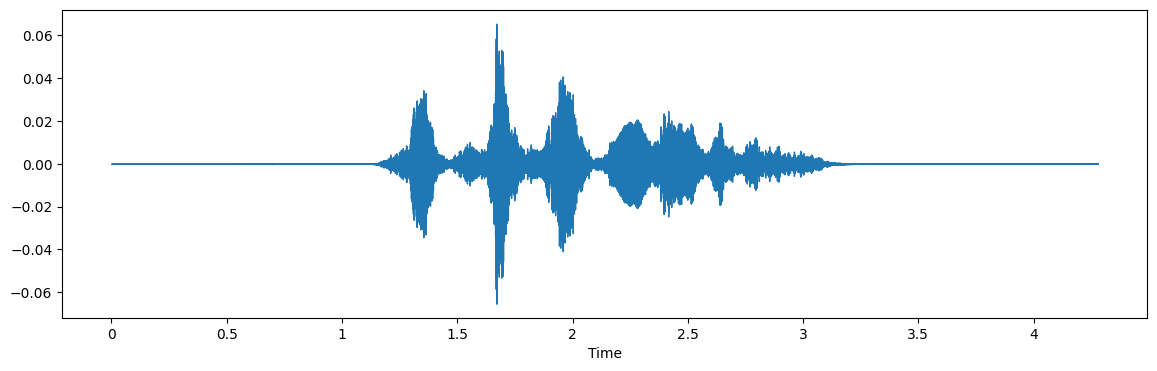

In [24]:
x = stretch(data, 0.85)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4. Shifting

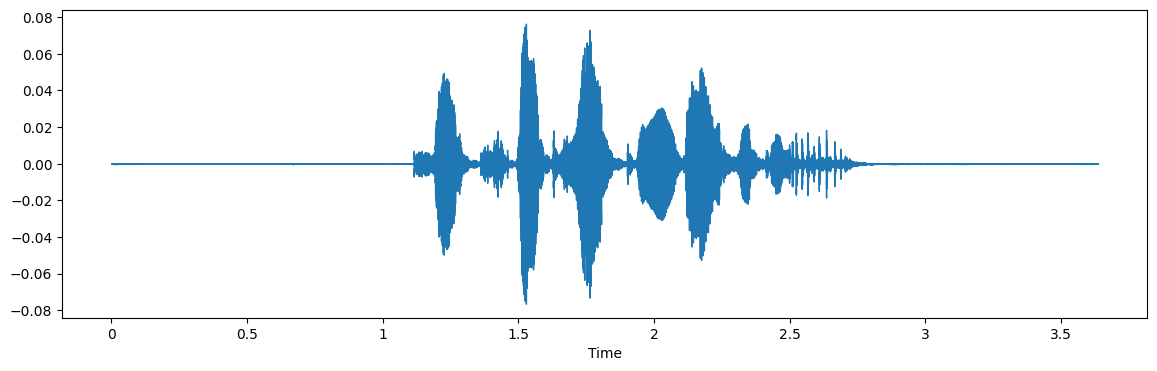

In [25]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch

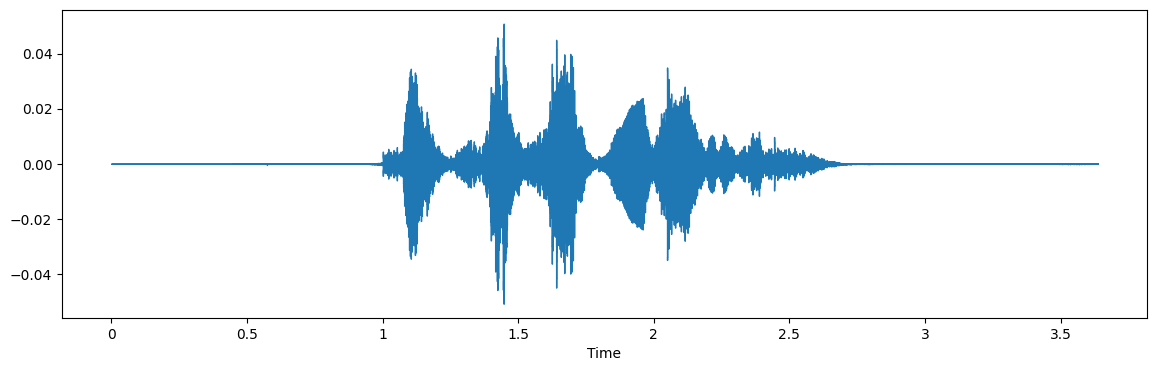

In [26]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction

With the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it. Extracting MFCC for the current experiment.

MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [27]:
def extract_features(data):
    # MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    result = mfcc
    return result

# funtion to transform audio
def transform_audio(data, fns):
    fn = random.choice(fns)
    if fn == pitch:
        fn_data = fn(data, sampling_rate)
    elif fn == "None":
        fn_data = data
    elif fn in [noise, stretch]:
        fn_data = fn(data)
    else:
        fn_data = data
    return fn_data


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)


    #randomly transforming audio data
    fns = [noise, pitch, "None"]

    fn1_data = transform_audio(data, fns)
    fn2_data = transform_audio(fn1_data, fns)
    res1 = extract_features(fn2_data)
    result = [np.array(res1[:,:108])]

    fn1_data = transform_audio(data, fns)
    fn2_data = transform_audio(fn1_data, fns)
    res2 = extract_features(fn2_data)[:,:108]
    result.append(res2)#np.vstack((result, res2)) # stacking vertically

    fn1_data = transform_audio(data, fns)
    fn2_data = transform_audio(fn1_data, fns)
    res3 = extract_features(fn2_data)[:,:108]
    result.append(res3)#np.vstack((result, res3)) # stacking vertically

    return result

In [28]:
path = "/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav"
data, sampling_rate = librosa.load(path, duration=2.5, offset=0.6)
#create_waveplot(data, sampling_rate, emotion)
#create_spectrogram(data, sampling_rate, emotion)
Audio(path)
xx1 = librosa.feature.zero_crossing_rate(data)
stft = np.abs(librosa.stft(data))
xx2 = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
xx3 = librosa.feature.mfcc(y=data, sr=sample_rate)
xx4 = librosa.feature.rms(y=data)
xx5 = librosa.feature.melspectrogram(y=data, sr=sample_rate)
xx1.shape, xx2.shape, xx3.shape, xx4.shape, xx5.shape, np.append(xx1,xx2,axis=0).shape


((1, 108), (12, 108), (20, 108), (1, 108), (128, 108), (13, 108))

In [29]:
X, Y = [], []
for path, emotion in zip(data_path.Path.to_list(), data_path.Emotions.to_list()):
    feature = get_features(path)
    for ele in feature:
        if ele.shape == (20, 108):
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
        else:
            print(ele.shape)

(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 103)
(20, 103)
(20, 103)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 107)
(20, 104)
(20, 104)
(20, 104)
(20, 101)
(20, 101)
(20, 101)
(20, 107)
(20, 107)
(20, 107)
(20, 105)
(20, 105)
(20, 105)
(20, 105)
(20, 105)
(20, 105)


In [30]:
len(X), len(Y), data_path.Path.shape

(4275, 4275, (1440,))

In [31]:
dfm = pd.DataFrame()
xx = pd.Series(X)
for i in range(20):
    dfm[i] = [k[i] for k in xx]

In [32]:
Features = dfm.copy()
Features['labels'] = Y
#Features.to_csv('features.csv', index=False)
Features.head()

0  \
0  [-373.8475256669195, -339.6919060165342, -336....   
1  [-769.17566, -766.7237, -714.51794, -657.7732,...   
2  [-598.6457185839646, -564.8573327754546, -567....   
3  [-913.6795, -913.7822, -914.4896, -913.27515, ...   
4  [-428.952080467705, -399.3633772076039, -409.3...   

                                                   1  \
0  [-8.268351062758752, -4.6071774751581565, -4.2...   
1  [0.0, 3.158663, -35.46454, -56.255814, -20.309...   
2  [-8.337910584194558, -7.011122028796196, -6.38...   
3  [-0.70246834, -0.579656, 0.0, 1.256418, 2.0291...   
4  [-1.588482432143593, -4.645612364095737, -1.57...   

                                                   2  \
0  [-0.6757793463213516, 2.2821094820245498, -0.4...   
1  [0.0, 2.2924185, 25.506073, -4.1653748, -35.96...   
2  [-1.0801507884664474, 3.164778230870052, -0.25...   
3  [0.5136359, 0.43074536, 0.0, 0.8290564, 1.1593...   
4  [4.635581579045459, 0.9658738345740506, 1.8422...   

                                                   3  \
0  [5.873945899119177, 2.9784090241153116, -0.481...   
1  [0.0, 1.039434, 2.6285462, 24.899235, 23.08912...   
2  [-8.189053912285205, 0.8604218178224325, 8.637...   
3  [0.16021296, 0.1511158, 0.0, -0.027385175, -0....   
4  [-2.4991371202260133, 1.092447699153957, 1.932...   

                                                   4  \
0  [-0.392335411490274, -0.2920608835529405, 3.37...   
1  [0.0, -0.35461602, -0.6928657, 11.646448, 5.31...   
2  [-3.6091320012195034, -3.1720246859177235, -2....   
3  [-0.6738144, -0.61583406, 0.0, -0.91241735, -1...   
4  [-7.9992991978917445, -2.1365765835370265, -1....   

                                                   5  \
0  [-2.8988910196096676, -1.3856843770478906, 3.5...   
1  [0.0, -1.6182545, 1.5450338, -6.318966, -13.65...   
2  [4.769453695054201, 3.414396609999808, 0.85426...   
3  [0.8473948, 0.7137997, 0.0, -1.2761537, -2.064...   
4  [-4.774952259167028, 2.9301703228134564, 2.185...   

                                                   6  \
0  [1.7132832782428222, -2.0096635402955894, -2.4...   
1  [0.0, -2.5084963, -15.426699, -22.163208, -20....   
2  [-8.274136539914894, -5.370391057898342, -4.35...   
3  [-1.0950017, -0.9352696, 0.0, -1.7005641, -2.3...   
4  [-3.2225041436166126, -2.6394415978401784, 0.4...   

                                                   7  \
0  [-3.0402578118943815, -3.5077465531361436, -3....   
1  [0.0, -2.8591795, -3.2997122, -3.7904625, -2.2...   
2  [-2.5560103782944434, -3.9411703219144427, -1....   
3  [0.51774013, 0.3998707, 0.0, -1.2141333, -1.91...   
4  [6.9448033297983205, 0.9072750523169406, 2.931...   

                                                   8  \
0  [-1.5136838486848099, 1.826449445152868, -1.83...   
1  [0.0, -2.6133559, -5.386924, 7.6483283, 14.673...   
2  [2.1338273836734114, -4.524265617142513, -5.99...   
3  [-0.30710116, -0.19278713, 0.0, -0.729783, -1....   
4  [-2.78266587921309, -3.5473418664269394, -1.66...   

                                                   9  ...  \
0  [-0.1612608395159405, 4.382351301309587, 6.617...  ...   
1  [0.0, -1.8335111, 2.138663, 5.72208, 5.5849123...  ...   
2  [4.736532516142745, 2.9565139684851047, 0.9190...  ...   
3  [-0.46301535, -0.43729722, 0.0, 0.08102304, 0....  ...   
4  [-0.9050284343654477, 1.2575251516655122, 1.78...  ...   

                                                  11  \
0  [-3.2940244521451882, -5.049322222156629, -4.1...   
1  [0.0, 0.5863835, 0.35875168, 0.21572351, 1.019...   
2  [2.423561486072827, 0.5919977486239956, -0.374...   
3  [-0.9362442, -0.7859234, 0.0, 1.2724004, 2.005...   
4  [0.9495181514752831, 0.519973457040943, 1.2137...   

                                                  12  \
0  [-0.9449698794763159, -2.3477589113211255, -4....   
1  [0.0, 1.7284367, 14.339331, 21.590836, 16.0408...   
2  [-3.151783258156763, -3.2843724724327115, -5.6...   
3  [0.9494423, 0.7546355, 0.0, 1.6500807, 2.21939...   
4  [-2.020166438853834, -2.5909045

In [33]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((4275, 20, 108), (4275,))

## Data Preparation

In [34]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [35]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3420, 20, 108), (3420, 8), (855, 20, 108), (855, 8))

In [36]:
# making data compatible to model.
x_train = np.expand_dims(x_train, axis=3)
x_train = np.swapaxes(x_train, 1, 2)
x_train = np.expand_dims(x_train, axis=3)

x_test = np.expand_dims(x_test, axis=3)
x_test = np.swapaxes(x_test, 1, 2)
x_test = np.expand_dims(x_test, axis=3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3420, 108, 20, 1, 1), (3420, 8), (855, 108, 20, 1, 1), (855, 8))

Modelling

In [37]:
input_shape = x_train.shape[1:]
input_shape #(108, 162, 1, 1)

(108, 20, 1, 1)

In [ ]:
Basic LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, BatchNormalization, Flatten, LSTM, Dropout, Dense

# Define input shape for TimeDistributed(Conv1D)
# For example: 20 timesteps, 100 features per timestep
input_shape = (20, 100, 1)  # Example: 20 timesteps, each with 100-length signal (e.g., MFCCs), and 1 channel

model = Sequential()

# Use Input layer at the start
model.add(Input(shape=input_shape))

# Conv1D inside TimeDistributed
model.add(TimeDistributed(Conv1D(16, kernel_size=3, padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))

# LSTM layer (after flattening)
model.add(LSTM(32))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.summary()

In [54]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, BatchNormalization, MaxPooling1D, GlobalAveragePooling1D, GRU, Bidirectional, Dropout, Dense

# input_shape = (20, 100, 1)  # (timesteps, features, channels)

# model = Sequential()
# model.add(Input(shape=input_shape))

# # Enhanced Conv1D feature extraction block
# model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
# model.add(TimeDistributed(Dropout(0.3)))

# model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(GlobalAveragePooling1D()))  # More efficient than Flatten
# model.add(TimeDistributed(Dropout(0.3)))

# # Replace GRU with Bidirectional GRU
# model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3)))

# # Stronger Dense layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(8, activation='softmax'))  # Assuming 8 classes

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_9              │ (None, 20, 100, 64)    │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 20, 100, 64)    │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 20, 50, 64)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 20, 50, 64)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 20, 50, 128)    │        24,704 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 50, 128)    │           512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 20, 128)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 20, 128)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,512 (490.28 KB)

 Trainable params: 125,128 (488.78 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Instantiate the Adam optimizer with a learning rate (optional)
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reduce learning rate on plateau callback
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=4, min_lr=1e-7)

epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[rlrp])


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7064 - loss: 0.9404
Accuracy of our model on test data :  70.99415063858032 %


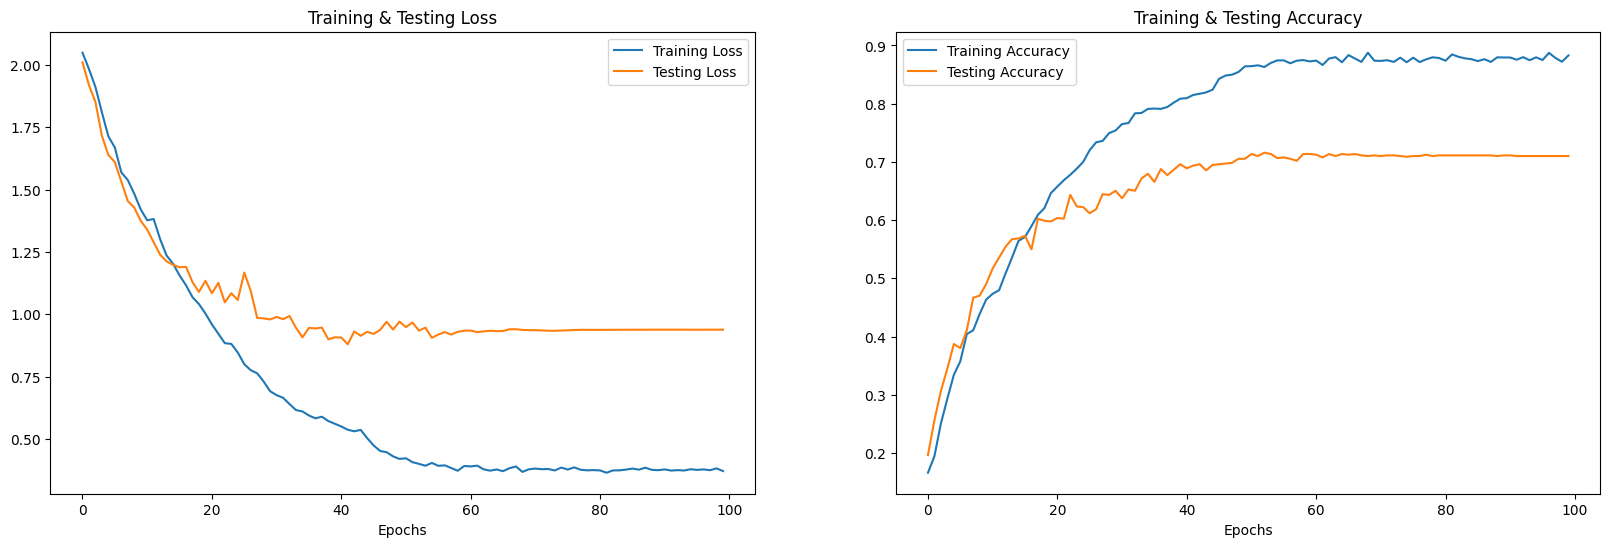

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 254ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0         surprise      surprise
1             fear       disgust
2            angry         angry
3            angry         angry
4         surprise      surprise
5         surprise         happy
6             fear          fear
7            happy         happy
8          neutral       neutral
9          disgust       disgust

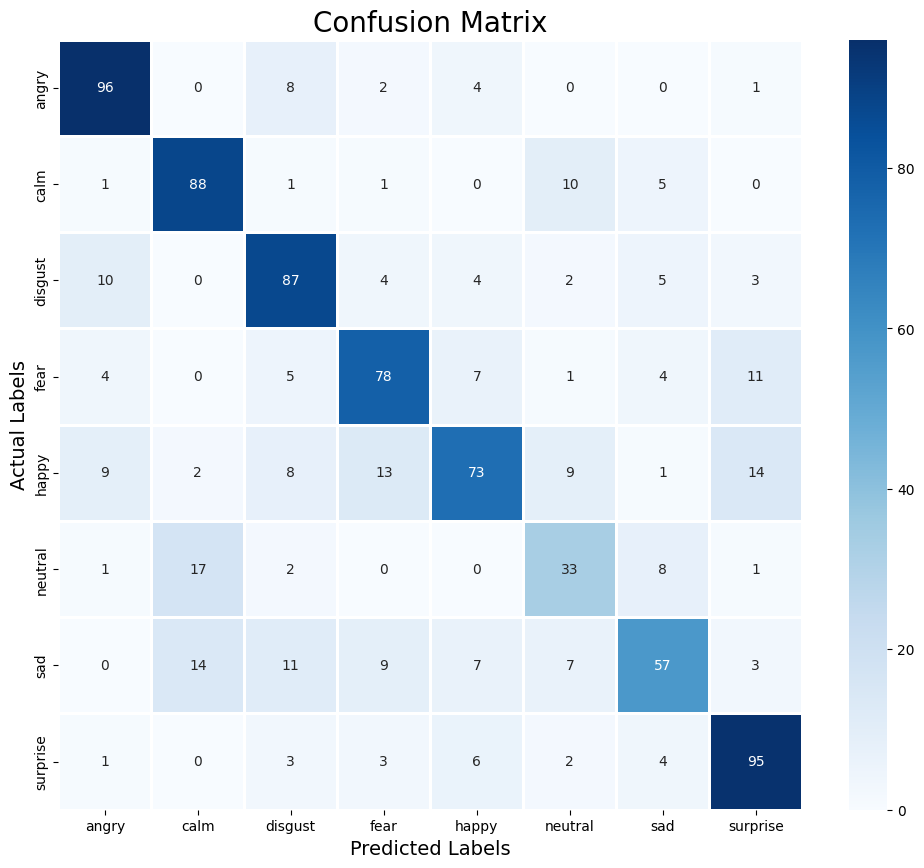

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.86      0.82       111
        calm       0.73      0.83      0.78       106
     disgust       0.70      0.76      0.72       115
        fear       0.71      0.71      0.71       110
       happy       0.72      0.57      0.63       129
     neutral       0.52      0.53      0.52        62
         sad       0.68      0.53      0.59       108
    surprise       0.74      0.83      0.79       114

    accuracy                           0.71       855
   macro avg       0.70      0.70      0.70       855
weighted avg       0.71      0.71      0.71       855

